# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
#taking a first look at the data
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
#note: temperature is measured in F; two categories for gender; heart rate measured in beats per minute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# Question 1: Normality Tests

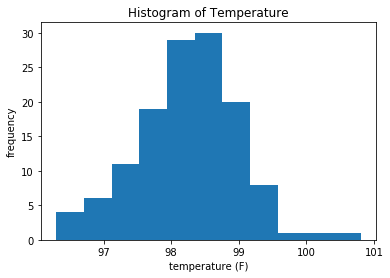

98.24923076923078
0.730357778905038


In [9]:
#normality test 1: graphically
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#plot histogram of body temperatures, using the sqrt rule for bins
df_temp = sorted(df['temperature'])
n_df_temp = len(df_temp)

n_bins = np.sqrt(n_df_temp)
n_bins = int(n_bins)

##compute mean and std
mean_temp = np.mean(df_temp)
std_temp = np.std(df_temp)

##plot histrogram
_ = plt.hist(df_temp, bins=n_bins)

#label title and axises
_ = plt.title('Histogram of Temperature')
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('frequency')

plt.show()
print(mean_temp)
print(std_temp)

The distribution has a larger tail (more values) on the left and smaller tail (less values) on the right with most data points concentrated at ~98.5 degrees (similar to the mean of 98.6).

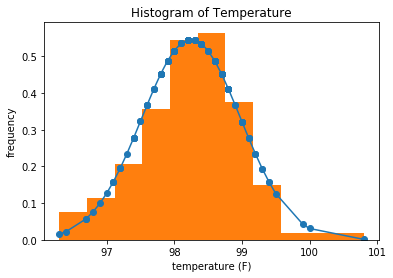

In [11]:
#now let's add a pdf to compare against the normal dist
fit = stats.norm.pdf(df_temp, mean_temp, std_temp)

_ = plt.plot(df_temp, fit, '-o')
_ = plt.hist(df_temp, bins=n_bins, density=True)

#label title and axises
_ = plt.title('Histogram of Temperature')
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('frequency')

plt.show()

Note: the distribution is a bit easier to see now and looks like it approaches the normal distribution. There are still fewer values on the right compared to the left. This is difficult to see since the sample is small (130 observations).  

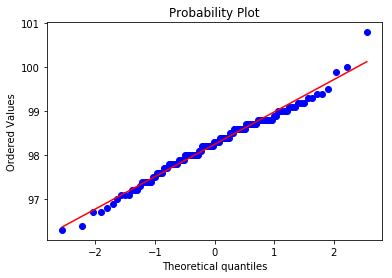

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)

In [12]:
#normality test 2: normal probability plot and SciPy's normality test

#construct the normal probability plot
_ = stats.probplot(df_temp, plot=plt)
plt.show()

stats.normaltest(df_temp)

Note: The observed normal probability plot and SciPy's test suggests that the sample follows a normal distribution. The p-value of 0.25 > 0.05, which means our decision is to fail to reject the null hypothesis that the sample follows a normal distribution. We'll verify with an empirical CDF test. 

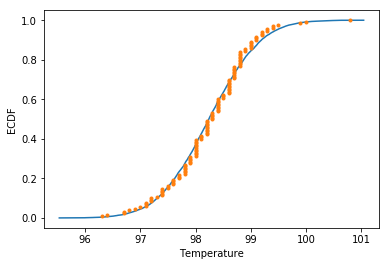

In [13]:
#Define an empirical CDF function
def ecdf(data):
    """Generate ECDF for array"""
    x = np.sort(data)
    y = np.arange(1.0, len(data)+1) / len(data)
    
    return x, y

#sample the normal distribution given sample mean and std
normal = np.random.normal(mean_temp, std_temp, 10000)

#call the ecdf function
x, y = ecdf(df_temp)
x_norm, y_norm = ecdf(normal)

#plot the call
_ = plt.plot(x_norm, y_norm)
_ = plt.plot(x, y, marker=".", ls="none")
_ = plt.xlabel("Temperature")
_ = plt.ylabel("ECDF")
plt.show()

The sample ECDF appears to follow the expected CDF relatively close and confirms our prior conclusion that the temperatures data set follows a normal distribution. 

### Conclusion: The sample follows a normal distribution. 

# Question 2: Is the sample size large? Are the observations independent?

Note: The sample includes 130 observations which is larger than 30, making it a large sample. We will assume that the observations are independent as one person's body metrics (temp, gender, and heartbeat) do not affect the others'.

### Conclusion: The sampe is large, the observations are independent, so we can apply Central Limit Theorem and relevant statistical tests.

# Question 3: Is the true population mean really 98.6 degrees F?

* First, try a bootstrap hypothesis test.
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  t  or  z  statistic?
* Now try using the other test. How is the result be different? Why?

First, to set up the solution to Question 3, we'll clarify a few of the sub-questions:

Q: Is it best to use a one-sample or two-sample test and why? 

A: Here, it is best to use a one-sample test since we are comparing one set of data to a single value. 


Q: Is it best to use the t or z statistic? 

A: Here, it is best to use a t-statistic since the population std is unknown. 

## First, we'll conduct a bootstrap hypothesis test: 

* Null hypothesis: True population mean is 98.6
* Alternative hypothesis: True population mean is not 98.6

In [32]:
#Replicate of resampled data array function

def reps(data, function): 
    """Return replicate of a resampled data array."""
    
    #Create resampled array and return stat:
    return function(np.random.choice(data, size=len(data)))



#Bootstrap replicates function

def draw_bsreps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    #Initialize array of replicates
    bs_replicates = np.empty(size)
    
    #Generate replicates
    for i in range(size): 
        bs_replicates[i] = reps(data, func)
        
    return bs_replicates

In [15]:
#Seed the random number generator
np.random.seed(25)

#Array of shifted temperatures
shifted_temp = df_temp - mean_temp + 98.6

#Draw bootstrap replicates of shifted temperatures
shifted_replicates = draw_bsreps(shifted_temp, np.mean, 10000)

#Compute p-value
p = np.sum(shifted_replicates <= mean_temp) / len(shifted_replicates)

print('p-value =', p)

p-value = 0.0


We can interpret this bootstrap test as: in every test conducted in our boostrap is significantly less than 0.01, so the null hypothesis (that the mean is 98.6) is rejected. 

## Second, we try frequentist statistical testing using a one-sided test with a t-statistic. 

In [16]:
#Test the null hypothesis that the population mean is 98.6
mu = 98.6

#Conduct one sided test
t_stat, t_pval = stats.ttest_1samp(df_temp, mu)

print("t-stat is:", t_stat)
print("p-value is:", t_pval)

t-stat is: -5.454823292364077
p-value is: 2.410632041561008e-07


## Then, we compare with a z-test. 

In [18]:
from statsmodels.stats.weightstats import ztest

#Calculate the standard error of the mean
z_stat, z_pval = ztest(df_temp, value=mu)

print("z-stat is:", z_stat)
print("p-value is:", z_pval)

z-stat is: -5.454823292364077
p-value is: 4.902157014113424e-08


Note: As expected, the z-statistics is close to the t-statistic. The p-value is also low, just like the bootstrap test. 

In [19]:
#Confidence level and degrees of freedom
print((stats.t.ppf(q=0.0005, df=n_df_temp-1)), (stats.t.ppf(q=0.9995, df=n_df_temp-1)))

-3.3675464541818454 3.367546454181878


Note: Our t-statistic (5.45) falls outside the t-distribution for a 99.9% confidence interval. 

### Conclusion: Based on the evidence from our boostrapped hypothesis test, t-test, and z-test, we reject the null hypothesis that the population mean is 98.6. 

# Question 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

First, to clarify on the sub-questions: 

Q: Which is the correct one to use?

A: Before evaluation, the t-test is traditionally the correct one to use, as the population is unknown and the sample (10) is small.

In [20]:
#First, draw a random sample of size=10 from the temp df
df_temp_sample10 = np.random.choice(df_temp, size=10)
df_temp_sample10

array([96.3, 98.9, 98.7, 99.5, 98.4, 98.3, 98.7, 99.5, 98.4, 99.2])

In [26]:
#Now conduct both tests
print(stats.ttest_1samp(df_temp_sample10, mu))
print(ztest(df_temp_sample10, value=mu))

Ttest_1sampResult(statistic=-1.8605210188381243, pvalue=0.09573390947125973)
(-1.8605210188381243, 0.06281184751609906)


Note: Both the t-stat and z-stat are lower and the p-value is higher. 

In [21]:
#Print quantiles of the t-distribution at 95%
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

#Print quantiles of the t-distribution at 99%
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-2.262157162740992 2.2621571627409915
-4.780912585933472 4.7809125859335495


### Conclusion: Both tests fall inside their respective distributions, but their pvalues are high. We cannot reject the null hypothesis that the population mean is 98.6F in this case. This is most likely due to the small sample size.

# Question 5: At what temperature should we consider someone's temperature to be "abnormal"?

* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [27]:
from scipy.stats import norm

#Start by computing margin of error and confidence interval

z_critic = norm.ppf(0.975)
print(z_critic)

1.959963984540054


In [28]:
##Calculate sem
sem = std_temp / np.sqrt(n_df_temp)

##Calculate moe
moe = z_critic * sem
print("Standard Error of the Mean is:", sem)
print("Margin of Error:", moe)

Standard Error of the Mean is: 0.06405661469519337
Margin of Error: 0.12554865777413818


In [30]:
CI = np.array([mean_temp - moe, mean_temp + moe])
print('97.5% Confidence Interval is:', CI)

97.5% Confidence Interval is: [98.12368211 98.37477943]


Note: At 99.9% confidence interval, the range of temperatures is only 98.04 and 98.5, which doesn't even include the proposed population mean of 98.6. Let's try the bootstrap approach.

In [48]:
replicates = draw_bsreps(df_temp, np.random.choice, 10000)

In [49]:
bs_std = np.std(replicates)

##Calculate sem
sem_replicates = bs_std / np.sqrt(len(replicates))

##Calculate moe
moe_replicates = z_critic * sem_replicates
print("Standard Error of the Mean is:", sem_replicates)
print("Margin of Error:", moe_replicates)

Standard Error of the Mean is: 0.007281785192519754
Margin of Error: 0.014272036720495783


In [50]:
CI = np.array([np.mean(replicates) - moe_replicates, np.mean(replicates) + moe_replicates])
print('97.5% Confidence Interval of the Replicates is:', CI)

97.5% Confidence Interval of the Replicates is: [98.23551796 98.26406204]


Note: The estimations are understandable more certain the larger the sample size, so our approximation to "abnormal" becomes less realistic with our bootstrapped sample. We can create a more realistic approximation with a prediction interval.

In [52]:
#Calculate the 97.5% prediction interval
PI = stats.norm.interval(0.975, loc=mean_temp, scale=std_temp)
print("97.5% Prediction Interval is:", PI)

97.5% Prediction Interval is: (96.61220485146553, 99.88625668699602)


### Conclusion: We consider the temperatures below 96.6F and above 99.9F to be "abnormal. 

# Question 6: Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

In [57]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [58]:
#First define the different data frames
male_temp = df.temperature[df.gender == "M"]
female_temp = df.temperature[df.gender == "F"]

#look at the data frames to ensure they are different than one above
male_temp.head()
female_temp.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

In [59]:
#Estimate the means
print("The mean body temperature of Male observations is:", np.mean(male_temp))
print("The mean body temperature of Female observations is:", np.mean(female_temp))

The mean body temperature of Male observations is: 98.1046153846154
The mean body temperature of Female observations is: 98.39384615384613


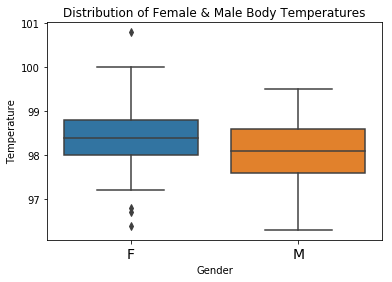

In [61]:
#Try comparing a box plot for visualization
import seaborn as sns

_ = sns.boxplot(x='gender', y='temperature', data=df)

# tick mark font size, label axes and add title:
_ = plt.tick_params(axis='x', which='major', labelsize=14)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
_ = plt.title('Distribution of Female & Male Body Temperatures')

# Display the plots:
plt.show()

Note: From both our quick summary means and box plot, we observe that there does seem to be a difference between the means. We'll now conduct a more thorough statistical analysis with a hypothesis test. For this test we use a two-sided t-test because we are comparing two samples and their means. 

* Null Hypothesis: mu_female = mu_male
* Alternative Hypothesis: mu_female /= mu_male

Significance Level: 95%

In [66]:
#try a two sided t-test
mu_female = np.mean(female_temp)
mu_male = np.mean(male_temp)

#Conduct one sided test
t_stat, t_pval = stats.ttest_ind(female_temp, male_temp)

print("t-stat is:", t_stat)
print("p-value is:", t_pval)

t-stat is: 2.2854345381656103
p-value is: 0.02393188312239561


In [67]:
#print confidence intervals
print((stats.t.ppf(q=0.025, df=65-1)), (stats.t.ppf(q=0.975, df=65-1)))

-1.9977296536259739 1.9977296536259734


Note: Here we receive a t-statistic of 2.29 and a p-value of 0.024, so we reject the null hypothesis. From the box plot above, it does seem that females have slightly higher body temperatures. 

### Conclusion: There is a "statistical significant" difference in body temperatures between females and males, with females appearing to have a slightly higher mean body temperature. 

Note: In the context of the original problem: 
* "The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?"

it appears that females have a body temperature closer to this conceptualized body temperature. 